In [1]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [2]:
#EXERCISE 1

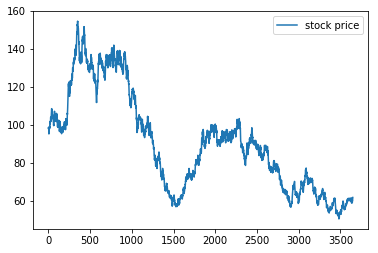

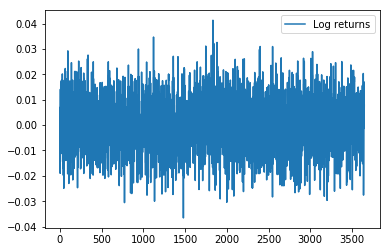

the annualized estimated mean log-return is -0.047
the annualized estimated log-return std deviation is 0.198


In [3]:
#(a)
import numpy as np

#(b)
import matplotlib.pyplot as plt

#(c)
S=[]
n=365*10
dt=1.0/365.0
sdt=np.sqrt(dt)
mu=0.06
sig=0.2
mudt=mu*dt
sig2dt=sig*sig*dt
dz = np.random.randn(n)*sdt
S=100*np.exp(np.cumsum( mudt-0.5*sig2dt+sig*dz ))

#(d)
plt.plot(S, label='stock price')
plt.legend()
plt.show()

#(e) 
logret=np.log(S[1:n]/S[0:n-1])

#(f)
plt.plot(logret, label='Log returns')
plt.legend()
plt.show()

#(g) Print the annualized mean and std. deviation of log-returns
print('the annualized estimated mean log-return is',
      '{:05.3f}'.format(np.mean(logret)/dt))
print('the annualized estimated log-return std deviation is',
      '{:05.3f}'.format(np.std(logret)/sdt))


In [4]:
#EXERCISE 2

25202


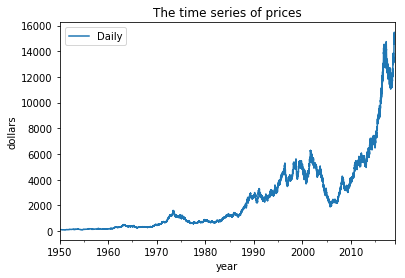

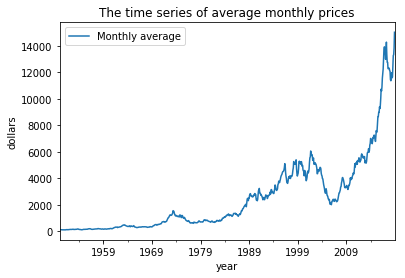

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#(a)
import pandas as pd

#(b) Do same as above, but now use pandas package to deal with time series.
prng=pd.period_range('1950-01-01','2018-12-31',freq='D')
n=len(prng)
dt=1.0/365.0
sdt=np.sqrt(dt)
mu=0.06
sig=0.20
mudt=mu*dt
sig2dt=sig*sig*dt
dz = np.random.randn(n)*sdt
S=pd.Series(100*np.exp(np.cumsum( mudt-0.5*sig2dt+sig*dz )),prng)

#(c)
#How many observations has your sample? 
n1=len(S)
print(n1)

#Plot time series of daily prices
S.plot(label='Daily')
plt.title('The time series of prices')
plt.ylabel('dollars')
plt.xlabel('year')
plt.legend()
plt.show()

#(d) Use resample to get monthly average price, say
S.resample('M').mean().plot(label='Monthly average')

#(e)
plt.title('The time series of average monthly prices')
plt.ylabel('dollars')
plt.xlabel('year')
plt.legend()
plt.show()


In [6]:
# see https://wrds-www.wharton.upenn.edu/pages/support/programming-wrds/programming-python/python-from-your-computer/

import wrds
db=wrds.Connection(wrds_username='joe')
#db.create_pgpass_file()

Loading library list...
Done


In [7]:
import pandas as pd
data=db.raw_sql("select  permco, date, prc, ret,vol "
           "from crsp.dsf "
           "where permco in (7,35048,8048,21446,20792) "
           "and date>='2001-01-01'"
            "and date<='2018-12-31'")


In [8]:
data.to_csv('test.csv', sep=';', index=False)
data = pd.read_csv("test.csv", sep=';')   


In [9]:
from datetime import datetime
import pandas as pd

aapl=db.raw_sql("select  date, ret "
           "from crsp.dsf "
           "where permco in (7) "
           "and date>='2001-01-01'"
            "and date<='2018-12-31'")
aapl["ret"]=(aapl["ret"]+1) #get gross return
aapl["ret"]=aapl["ret"].cumprod()
aapl=aapl.rename(index=aapl["date"], columns={"ret": "AAPL"})



gs=db.raw_sql("select  date, ret "
           "from crsp.dsf "
           "where permco in (35048) "
           "and date>='2001-01-01'"
            "and date<='2018-12-31'")
gs["ret"]=(gs["ret"]+1) #get gross return
gs["ret"]=gs["ret"].cumprod()
gs=gs.rename(index=gs["date"], columns={"ret": "GS"})


ms=db.raw_sql("select  date, ret "
           "from crsp.dsf "
           "where permco in (8048) "
           "and date>='2001-01-01'"
            "and date<='2018-12-31'")
ms["ret"]=(ms["ret"]+1) #get gross return
ms["ret"]=ms["ret"].cumprod()
ms=ms.rename(index=ms["date"], columns={"ret": "MSFT"})


pg=db.raw_sql("select  date, ret  "
           "from crsp.dsf "
           "where permco in (21446) "
           "and date>='2001-01-01'"
            "and date<='2018-12-31'")
pg["ret"]=(pg["ret"]+1) #get gross return
pg["ret"]=pg["ret"].cumprod()
pg=pg.rename(index=pg["date"], columns={"ret": "PG"})


ge=db.raw_sql("select  date, ret  "
           "from crsp.dsf "
           "where permco in (20792) "
           "and date>='2001-01-01'"
            "and date<='2018-12-31'")
ge["ret"]=(ge["ret"]+1) #get gross return
ge["ret"]=ge["ret"].cumprod()
ge=ge.rename(index=ge["date"], columns={"ret": "GE"})

df3 = pd.merge(aapl,gs,on='date')
df3 = pd.merge(df3,ms,on='date')
df3 = pd.merge(df3,pg,on='date')
S_real = pd.merge(df3,ge,on='date')
S_real['date']=pd.to_datetime(S_real['date'], format='%Y-%m-%d')
S_real=S_real.set_index('date')


In [10]:
#EXERCISE 3 and 4

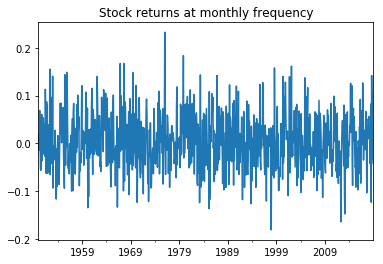

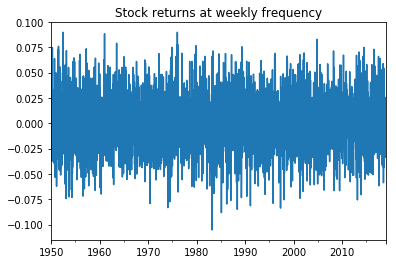

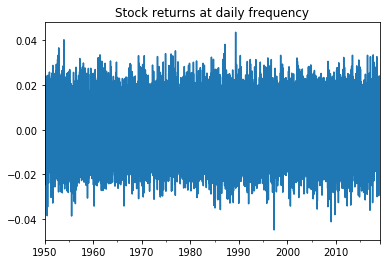

minor         SIM                        
                M           W           D
major                                    
count       827.0      3601.0     25201.0
mean        0.37%       0.08%       0.01%
std         5.87%       2.77%       1.04%
min       -18.10%     -10.52%      -4.49%
25%        -3.75%      -1.79%      -0.70%
50%         0.12%       0.02%       0.01%
75%         4.10%       1.94%       0.72%
max        23.23%       8.98%       4.36%

minor                    SIM                
                           M       W       D
major                                       
ann. sample mean       4.42%   4.32%   4.33%
ann. sample std.dev.  20.34%  19.99%  19.92%

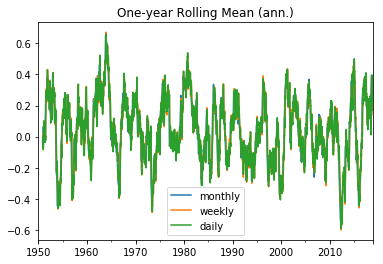

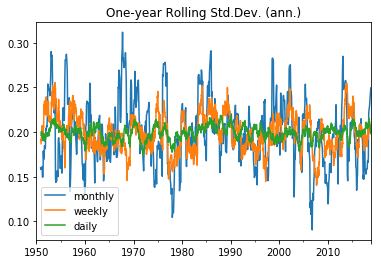


 Estimated and Theoretical Moments of Sample Mean: 


minor       Sample Mean        Sample Variance       
                      M      D               M      D
major                                                
Estimated         4.42%  4.33%           4.13%  4.14%
Theoretical       6.00%  6.00%           4.00%  4.00%


 Estimated and Theoretical Moments of Sample Variance: 


minor       Sample Mean          Sample Variance           
                      M        D               M          D
major                                                      
Estimated       0.04147  0.03968       0.0002278  9.615e-06
Theoretical      0.0403  0.04001       0.0002707  8.771e-06

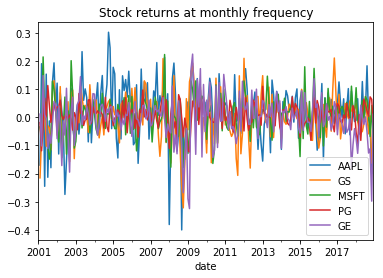

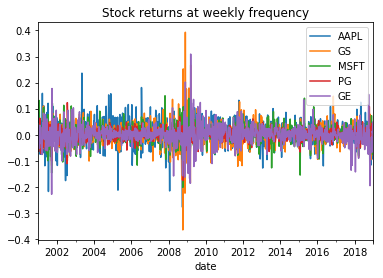

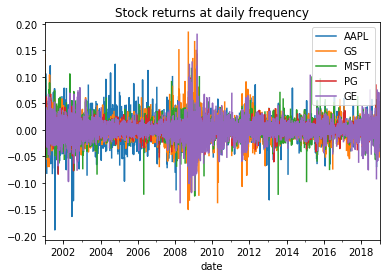

minor        AAPL                                  GE                          \
                M           W           D           M           W           D   
major                                                                           
count       215.0       939.0      3543.0       215.0       939.0      3543.0   
mean        2.21%       0.54%       0.06%       0.27%       0.07%       0.03%   
std        10.30%       4.90%       2.28%       8.44%       4.72%       2.14%   
min       -39.98%     -27.85%     -18.84%     -32.16%     -36.56%     -14.98%   
25%        -3.37%      -2.27%      -1.01%      -5.27%      -2.29%      -0.98%   
50%         2.78%       0.76%       0.03%       1.25%       0.33%       0.00%   
75%         9.09%       3.44%       1.17%       5.44%       2.51%       1.04%   
max        30.18%      23.62%      12.36%      21.03%      39.32%      18.39%   

minor          GS                                MSFT                          \
                M           W           D           M           W           D   
major                                                                           
count       215.0       939.0      3543.0       215.0       939.0      3543.0   
mean        0.76%       0.20%       0.04%       0.66%       0.15%       0.03%   
std         6.93%       3.59%       1.79%       4.22%       2.37%       1.14%   
min       -17.84%     -20.23%     -12.46%     -12.35%     -17.60%      -8.32%   
25%        -3.76%      -1.64%      -0.79%      -1.96%      -1.02%      -0.50%   
50%         1.69%       0.17%       0.00%       0.87%       0.21%       0.03%   
75%         5.00%       2.08%       0.86%       3.22%       1.43%       0.54%   
max        22.27%      14.94%      11.57%      11.27%      12.29%       9.73%   

minor          PG                          
                M           W           D  
major                                      
count       215.0       939.0      3543.0  
mean       -0.57%      -0.13%      -0.01%  
std         7.86%       4.11%       1.88%  
min       -32.41%     -22.89%     -13.68%  
25%        -4.53%      -1.85%      -0.80%  
50%        -0.43%      -0.06%       0.00%  
75%         4.00%       1.82%       0.80%  
max        22.41%      30.94%      17.98%

minor                   AAPL                      GE                      GS  \
                           M       W       D       M       W       D       M   
major                                                                          
ann. sample mean      26.51%  27.85%  14.58%   3.22%   3.50%   8.73%   9.08%   
ann. sample std.dev.  35.66%  35.36%  36.27%  29.25%  34.02%  33.91%  24.01%   

minor                                   MSFT                      PG          \
                           W       D       M       W       D       M       W   
major                                                                          
ann. sample mean      10.21%  10.80%   7.96%   7.69%   7.00%  -6.90%  -7.00%   
ann. sample std.dev.  25.86%  28.49%  14.63%  17.08%  18.02%  27.23%  29.61%   

minor                         
                           D  
major                         
ann. sample mean      -2.24%  
ann. sample std.dev.  29.84%

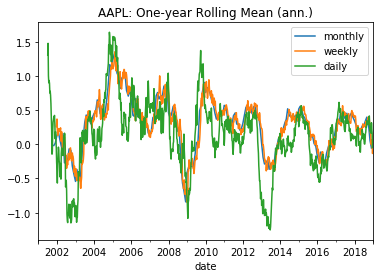

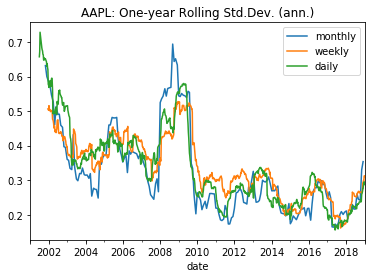

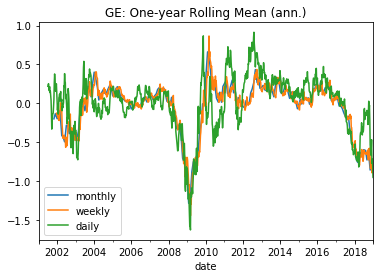

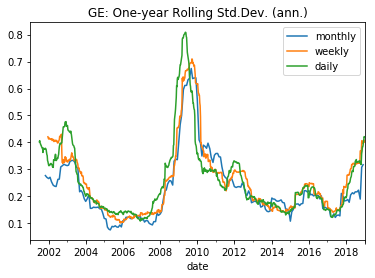

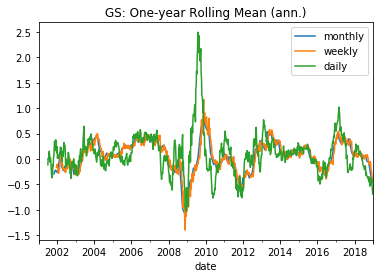

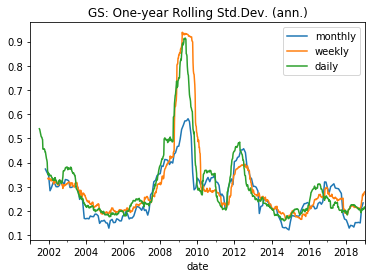

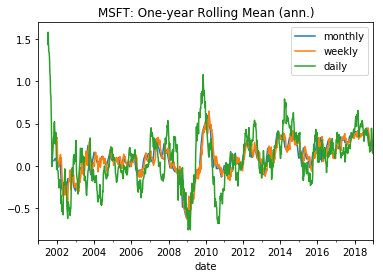

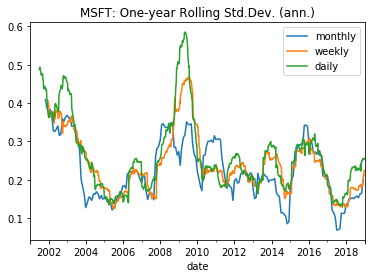

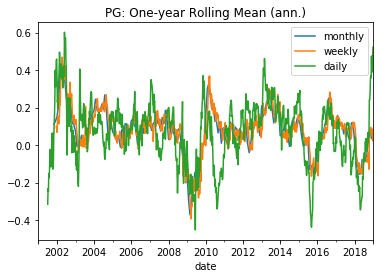

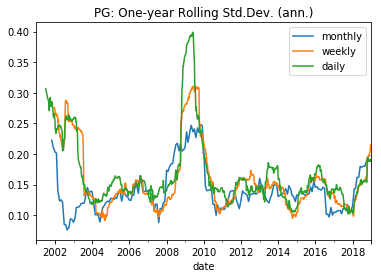

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML
from IPython.display import display
pd.set_option('display.max_columns', 50)
pd.set_option('max_colwidth',40)

#As in EXERCISE 2, simulate a path of the share price
prng=pd.period_range('1950-01-01','2018-12-31',freq='D')
n=len(prng)
dt=1.0/365.0
sdt=np.sqrt(dt)
mu=0.06
sig=0.20
mudt=mu*dt
sig2dt=sig*sig*dt
dz = np.random.randn(n)*sdt
S_sim=pd.Series(100*np.exp(np.cumsum( mudt-0.5*sig2dt+sig*dz )),prng)

#EXERCISE 3 & 4: SIMULATED and REAL data
data_sources = ['SIM','REAL']
for data_source in data_sources: 
    
    if data_source=='SIM': 
        S = S_sim
        ticker_list =['SIM']
    else: 
        S = S_real
        ticker_list =['AAPL','GE','GS','MSFT','PG']

    if isinstance(S,pd.DataFrame):
        N_assets = len(S.columns)
    else: 
        N_assets = 1


    #Define the sampling frequencies: M, W, or D
    samp_freq = ['M','W','D']
    descr_freq = {'M': 'monthly', 'W': 'weekly', 'D': 'daily'}
    label_freq = {'M': '1. M', 'W': '2. W', 'D': '3. D'}
    descr_window = {'M': '12-month', 'W': '52-Week', 'D': '365-days'}
    N_periods = {'SIM': {'M': 12, 'W': 52, 'D': 365},'REAL': {'M': 12, 'W': 52, 'D': 252}} #  for real data, use e.g. 252 days for number of daily observations
    Nmin_periods = {'SIM': {'M': 10, 'W': 50, 'D': 350},'REAL': {'M': 10, 'W': 50, 'D': 100}} #  for real data, use e.g. 100 days for number of daily observations

    #Solutions
    tmp = S_sim.describe()
    index_stats = list(tmp.index.values)
    
    p_stats={}
    p_mean_vol={}
    p_est_mean={}
    p_est_var={}
    p_rolling_mean={}
    p_rolling_std={}
    data = []
    for freq in samp_freq: 

        #Auxiliary data
        N_per = N_periods[data_source][freq]
        Nmin_per = Nmin_periods[data_source][freq]

        #(a) Compute log-returns at new frequency
        S1 = S.resample(freq).last()
        logret = np.log(S1/S1.shift(1))
        logret.plot(label=descr_freq[freq],title='Stock returns at '+descr_freq[freq]+' frequency')
        plt.show()

        #(b) Get some summary statistics
        tmp = logret.describe()
        stats = tmp.values
        p_stats[label_freq[freq]] = pd.DataFrame(stats, columns=ticker_list,index=index_stats)    

        #(c) Annualized mean and std. deviation
        mean_vol = np.array(logret.mean()*N_per)
        mean_vol = np.vstack((mean_vol,logret.std()*np.sqrt(N_per)))
        p_mean_vol[label_freq[freq]] = pd.DataFrame(mean_vol, columns=ticker_list,index=['ann. sample mean','ann. sample std.dev.'])

        #(d) Time-series of the annualized rolling mean and std. dev. of log-returns
        p_rolling_mean[freq]= logret.rolling(window=N_per,min_periods=Nmin_per).mean()*N_per
        p_rolling_std[freq]= logret.rolling(window=N_per,min_periods=Nmin_per).std()*np.sqrt(N_per)

        #(f) Compare variance of the mean and variance estimator to the theoretical moments
        if data_source=='SIM': 
            if freq in ['M','D']: 
                logret2=logret**2

                mask = (logret.resample('A').count()>=Nmin_per)
                tmp = logret.resample('A').mean()*N_per
                logret_mean = tmp[mask]

                tmp = logret2.resample('A').mean()*N_per
                logret_var = tmp[mask]

                smp_mean_m_est = logret_mean.mean()
                smp_mean_v_est = logret_mean.var()
                smp_mean_m_theo = mu
                smp_mean_v_theo = sig**2

                smp_var_m_est = logret_var.mean()
                smp_var_v_est = logret_var.var()
                smp_var_m_theo = sig**2+mu**2*1/N_per
                smp_var_v_theo = 2*np.power(sig,4)/N_per+4*mu**2*sig**2*1/(N_per**2)

                data_est_mean = np.array([smp_mean_m_est,smp_mean_v_est])
                data_est_mean = np.vstack((data_est_mean,np.array([smp_mean_m_theo,smp_mean_v_theo])))
                p_est_mean[label_freq[freq]] = pd.DataFrame(data_est_mean,
                    columns=['Sample Mean','Sample Variance'],index=['Estimated','Theoretical'])    
                
                data_est_var = np.array([smp_var_m_est,smp_var_v_est])
                data_est_var = np.vstack((data_est_var,np.array([smp_var_m_theo,smp_var_v_theo])))
                p_est_var[label_freq[freq]] = pd.DataFrame(data_est_var,
                    columns=['Sample Mean','Sample Variance'],index=['Estimated','Theoretical'])    
    
    
    #(b) Display summary statistics
    #--------------------------------------------------
    p_stats = pd.Panel(p_stats)
    df_stats = p_stats.to_frame().unstack(1)
    df_stats.columns = df_stats.columns.swaplevel(0, 1)
    df_stats.sort_index(1,inplace=True)
    tmp = df_stats.columns.levels[1].values
    for freq in samp_freq: 
        df_stats.rename(columns = {label_freq[freq]:freq}, inplace = True)
    for ind in df_stats.index.difference(['count']): 
        df_stats.loc[ind] = df_stats.loc[ind].apply(lambda n: '{0:.2%}'.format(n))
    df_stats.loc['count'] = df_stats.loc['count'].apply(lambda n: '{:10}'.format(n))
    display(df_stats)

    
    #(c) Display annualized mean and standard deviation
    #--------------------------------------------------
    p_mean_vol = pd.Panel(p_mean_vol)
    df_mean_vol = p_mean_vol.to_frame().unstack(1)
    df_mean_vol.columns = df_mean_vol.columns.swaplevel(0, 1)
    df_mean_vol.sort_index(1,inplace=True)
    for freq in samp_freq: 
        df_mean_vol.rename(columns = {label_freq[freq]:freq}, inplace = True)
    for ind in df_mean_vol.index: 
        df_mean_vol.loc[ind] = df_mean_vol.loc[ind].apply(lambda n: '{0:.2%}'.format(n))
    display(df_mean_vol)
    

    #(d) Display annualized mean and standard deviation
    #--------------------------------------------------
    if data_source=='REAL': 
        for asset in ticker_list: 
            for freq in samp_freq: 
                RollingMean = p_rolling_mean[freq][asset]
                RollingMean.plot(label=descr_freq[freq])
            plt.title(asset+': One-year Rolling Mean (ann.)')
            plt.legend()
            plt.show()
            for freq in samp_freq: 
                RollingStd = p_rolling_std[freq][asset]
                RollingStd.plot(label=descr_freq[freq])
            plt.title(asset+': One-year Rolling Std.Dev. (ann.)')
            plt.legend()
            plt.show()
    else: 
        for freq in samp_freq: 
            RollingMean = p_rolling_mean[freq]
            RollingMean.plot(label=descr_freq[freq])
        plt.title('One-year Rolling Mean (ann.)')
        plt.legend()
        plt.show()
        for freq in samp_freq: 
            RollingStd = p_rolling_std[freq]
            RollingStd.plot(label=descr_freq[freq])
        plt.title('One-year Rolling Std.Dev. (ann.)')
        plt.legend()
        plt.show()
    
    
    #EX3 (f): 
    #--------------------------------------------------
    #Display mean and variance of sample mean and sample variance
    #How does it compare to the theoretical moments we we derived in class? 
    if data_source=='SIM': 
        
        print('\n Estimated and Theoretical Moments of Sample Mean: ')
        p_est_mean = pd.Panel(p_est_mean)
        df_est_mean = p_est_mean.to_frame().unstack(1)
        df_est_mean.columns = df_est_mean.columns.swaplevel(0, 1)
        df_est_mean.sort_index(1, inplace=True)
        for freq in ['M','D']:  
            df_est_mean.rename(columns = {label_freq[freq]:freq}, inplace = True)
        for ind in df_est_mean.index: 
            df_est_mean.loc[ind] = df_est_mean.loc[ind].apply(lambda n: '{0:.2%}'.format(n))
        display(df_est_mean)

        print('\n Estimated and Theoretical Moments of Sample Variance: ')
        p_est_var = pd.Panel(p_est_var)
        df_est_var = p_est_var.to_frame().unstack(1)
        df_est_var.columns = df_est_var.columns.swaplevel(0, 1)
        df_est_var.sort_index(1, inplace=True)
        for freq in ['M','D']: 
            df_est_var.rename(columns = {label_freq[freq]:freq}, inplace = True)
        for ind in df_est_var.index: 
            df_est_var.loc[ind] = df_est_var.loc[ind].apply(lambda n: '{0:.4}'.format(n))
        display(df_est_var)
    


EX3 (e):
--------------------------------------------------
Consider first the time-series of rolling means at a monthly frequency. 
Note that each data point of this time-series gives
one estimation of the expected return mu of the stock 
which uses a sample size of one year. 
It is immediately clear from the figure
that our estimation of mu is quite noise: 
Depending on the period considered, our estimation 
varies approx. between +/- 40%! 
In other words, if you were an econometrician 
trying to estimate mu, and all you had at your disposal
was a time/series of returns over a one year horizon, 
you could have easily concluded that mu = 40% or mu = -30%, 
when in fact, mu = 6%! 

Consider now the time-series of rolling means at a weekly frequency.
Note that, just as before, each data point of this time-series gives
one estimation of the expected return mu of the stock 
which uses a sample size of one year: 
only the SAMPLING FREQUENCY has changed. 
But the historical variation in the rolling means 
is just as large as before, approx. between +/- 40%. 
Thus, the noise in the estimation of mu 
has not improved at all!
If you were an econometrician, with one year of data, 
trying to estimate mu, you could be just as wrong as before, 
even though you have a larger dataset. 
As discussed in class, only the total length of dataset matters, 
and this is not changing (one year), 
even though the number of observations is increasing 
as you increase your sampling frequency. 

This result is particularly clear we consider 
the time-series of rolling means at a daily frequency.
The sample size has increased from 12 points (monthly) to 365 points, 
and yet the historical variation of our estimate 
is just as large as before, approx. between +/- 40%! 
Only improving the length of the horizon 
can reduce the noise in your estimation of mu. 

Moving on, do we see a similar patter 
when we consider our estimator of sigma, 
which is the sample standard deviation? 
The answer is clearly no! 
Consider first the time-series of rolling std. dev. at a monthly frequency. 
Depending on the period considered, our estimation 
varies approx. between 10% and 30%! 
In other words, if you were an econometrician 
trying to estimate sigma, and all you had at your disposal
was a time/series of returns over a one year horizon, 
you could have easily concluded that sigma = 30% or sigma = 10%, 
when in fact, sigma = 20%! 

Consider now the time-series of rolling std. dev. at a weekly frequency.
Note that, just as before, each data point of this time-series gives
one estimation of the volatility sigma of the stock 
which uses a sample size of one year: 
only the SAMPLING FREQUENCY has changed. 
But the historical variation in the rolling std. dev. 
has tightened significantly, approx. between 16% and 24%. 
If you were an econometrician, with one year of data, 
trying to estimate sigma, the risk of being widly wrong 
has been dramatically reduced. 
As discussed in class, 
increasing the sampling frequency allows you 
to estimate the volatility much more precisely, 
even though the horizon has not changed (one year). 

This result is particularly clear we consider 
the time-series of rolling std. dev. at a daily frequency.
The sample size has increased from 12 points (monthly) to 365 points, 
The historical variation of our estimate 
is much tighter than before, approx. between 19% and 22% 
Increasing the sampling frequency
can reduce the noise in your estimation of sigma. 

EX3 (e):
--------------------------------------------------
Consider first the moments of the sample mean. 
The empirical moments are not too far from the theoretical moments, 
but the match is far from perfect. 
The sample mean of the sample mean can be several % points away from mu, 
even though we know that the sample mean is an unbiased estimator of mu. 
    
Consider first the moments of the sample variance. 
As we have seen in class, this estimator is biased. 
So the sample mean of the sample variance is not equal to sigma^2 
But even at a monthly frequency, the difference is small. 
At a daily frequency, the bias is very tiny. 
Even more impressively, not is the sample mean of the sample variance 
almost equal to the theoretical variance sigma^2, 
but the sample variance of our estimator 
(i.e., the variance of the sample variance) is close to zero. 
Thus, given any one-year dataset, you would have been able 
to estimate sigma with great accuracy. 


EX4 (g): How does the variation in the mean and std. dev. estimates 
--------------------------------------------------
compare across sampling frequencies when we consider real data? 
What could explain the difference with the pattern observed
when we considered simulated data? 
    
The first point we notice is that the historical variation 
of the rolling means is even larger than before. 
It seems that in the real world 
estimating the expected return of a stock is even harder
than it is when using simulated data. 
Notice is particular the huge crash in the sample means 
during the Financial Crisis of 2008-09. 
    
Moving on to the rolling standard deviation, 
remember the pattern we discussed in EX3 (e): 
As we increased the sampling frequency 
from monthly to weekly to daily, 
the historical variation of the rolling std. dev. tightened significantly, 
i.e., the noise in the estimation of the volatility steadily increased.
Do you see the same pattern with real data? 
The answer is clearly no! 
Now the range of the time-series of the rolling std. dev. is very wide, 
and remains wide even at a high sampling frequency. 
What could be a reason behind this difference? 
In our model (GBM), we assumed to the volatility is CONSTANT, 
but in reality, volatility varies a lot over time, 
i.e., volatility itself follows a stochastic process
(e.g. as in the stochastic volatility model of Heston (1993))
This is probably one reason why estimating volatility 
is no easy task either in the real world. 
    
Combined with our earlier discussion on the difficulty
of estimating expected returs, 
you can see why it is so challening to implement
the mean-variance portfolio framework in practice. 
